In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']

tracks.drop(columns2drop, inplace=True, axis=1)

df0 = tracks.copy()

tracks.shape

(106486, 40)

In [3]:
tracks.head(20) #Display the first 5 objects of the dataset

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
0,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
1,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
2,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
3,0,4,6,47632,2,0,3,74,343,7419,...,2008.0,11.0,26.0,3,2008,11,25,0,0,0
4,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
5,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
6,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
7,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
8,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
9,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106486 entries, 0 to 106485
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   album_comments                                          106486 non-null  int64  
 1   album_favorites                                         106486 non-null  int64  
 2   album_id                                                106486 non-null  int64  
 3   album_listens                                           106486 non-null  int64  
 4   album_tracks                                            106486 non-null  int64  
 5   album_type                                              106486 non-null  int64  
 6   artist_comments                                         106486 non-null  int64  
 7   artist_favorites                                        106486 non-null  int64  
 8   artist_location         

In [5]:
#Label Encoder from the scikit library to encode all the categorical features.
cat_df=tracks.select_dtypes(include='object')

for col in tracks.columns:
    if col in cat_df.columns.tolist():
        le = LabelEncoder()
        tracks[col] = le.fit_transform(tracks[col].astype(str))
    else:
        scaler = StandardScaler()
        tracks[col] = scaler.fit_transform(tracks[[col]])

tracks.describe()

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
count,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,...,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,1.064860e+05,106486.0,1.064860e+05
mean,3.595176e-14,3.266914e-14,-5.901877e-15,8.041756e-16,-7.963245e-15,-6.149732e-14,-3.935010e-15,-6.702224e-16,-6.150099e-15,8.813160e-16,...,6.566253e-15,-2.724548e-14,1.279170e-15,-2.329983e-14,1.233954e-12,3.555899e-14,1.114360e-15,-5.249205e-14,0.0,1.458362e-13
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,1.000005e+00
min,-6.146919e-01,-7.298407e-01,-2.041544e+00,-2.173133e-01,-5.188713e-01,-3.538532e-01,-4.596748e-01,-3.089038e-01,-1.340766e+00,-1.766941e+00,...,-1.474065e+00,-1.512492e+00,-1.579770e+00,-1.233105e+00,-1.846726e+00,-1.485012e+00,-1.625255e+00,-1.211995e+00,0.0,-4.089950e-01
25%,-1.741268e-01,-4.107693e-01,-8.005752e-01,-1.945835e-01,-3.186591e-01,-3.538532e-01,-3.009466e-01,-2.890133e-01,-8.063780e-01,-8.714476e-01,...,-6.765722e-01,-9.675723e-01,-9.222026e-01,-1.233105e+00,-1.052219e+00,-9.262511e-01,-8.413326e-01,-1.211995e+00,0.0,-4.089950e-01
50%,-1.741268e-01,-4.107693e-01,8.664924e-02,-1.564864e-01,-2.185529e-01,-3.538532e-01,-3.009466e-01,-2.492322e-01,-5.446370e-01,-4.114408e-04,...,-2.778260e-01,-1.501925e-01,6.414853e-02,5.814118e-01,1.395420e-01,-8.810957e-02,-5.741002e-02,5.802009e-01,0.0,-4.089950e-01
75%,-1.741268e-01,-9.169790e-02,8.544212e-01,-5.714324e-02,-6.839370e-02,-3.538532e-01,-1.422183e-01,-1.398342e-01,8.295029e-01,8.843553e-01,...,9.184127e-01,9.396473e-01,8.313105e-01,5.814118e-01,9.340491e-01,1.029413e+00,8.385014e-01,5.802009e-01,0.0,-4.089950e-01
max,2.317583e+01,1.905259e+01,1.607401e+00,2.387982e+01,1.582346e+01,4.175451e+00,1.223858e+01,9.278340e+00,2.283100e+00,1.725999e+00,...,2.114651e+00,1.484567e+00,1.708067e+00,1.488670e+00,1.728556e+00,1.588174e+00,1.734413e+00,1.476299e+00,0.0,2.445018e+00


In [6]:
train_data = tracks.values
train_data

array([[-0.17412679,  0.86551632, -2.041226  , ...,  1.47629908,
         0.        ,  2.44501794],
       [-0.17412679,  0.86551632, -2.041226  , ...,  1.47629908,
         0.        ,  2.44501794],
       [-0.17412679,  0.86551632, -2.041226  , ...,  1.47629908,
         0.        ,  2.44501794],
       ...,
       [-0.17412679, -0.4107693 ,  1.60740087, ..., -1.21199532,
         0.        , -0.40899495],
       [-0.17412679, -0.4107693 ,  1.60740087, ..., -1.21199532,
         0.        , -0.40899495],
       [-0.17412679, -0.0916979 ,  1.6019929 , ...,  0.58020094,
         0.        , -0.40899495]])

Split the dataset into 70% train and 30% test

In [7]:
def get_similarity_stats(labels_):
    hist, bins = np.histogram(labels_, bins=range(-1, len(set(labels_)) + 1))

    print('labels', dict(zip(bins, hist)))
    print('silhouette', silhouette_score(train_data, labels_))
    
    l = list()
    for i in range(len(labels_)):
        lpred = abs(labels_[i])
        ltrue = df['Attrition'][i]
        if ltrue == lpred:
            l.append(ltrue)

    print('number of values rightly guessed', len(l))
    print('percentage of values rightly guessed', (len(l) / len(df['Attrition'])) * 100)

    print('number of 1s rightly guessed', len([x for x in l if x == 1]))
    print('percentage of 1s rightly guessed', (len([x for x in l if x == 1]) / len([x for x in df['Attrition'] if x == 1])) * 100)

    print('number of 0s rightly guessed', len([x for x in l if x == 0]))
    print('percentage of 0s rightly guessed', (len([x for x in l if x == 0]) / len([x for x in df['Attrition'] if x == 0])) * 100)
    print('------------------')

*DBSCAN*

In [8]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106486 entries, 0 to 106485
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   album_comments                                          106486 non-null  float64
 1   album_favorites                                         106486 non-null  float64
 2   album_id                                                106486 non-null  float64
 3   album_listens                                           106486 non-null  float64
 4   album_tracks                                            106486 non-null  float64
 5   album_type                                              106486 non-null  float64
 6   artist_comments                                         106486 non-null  float64
 7   artist_favorites                                        106486 non-null  float64
 8   artist_location         

Box Plot

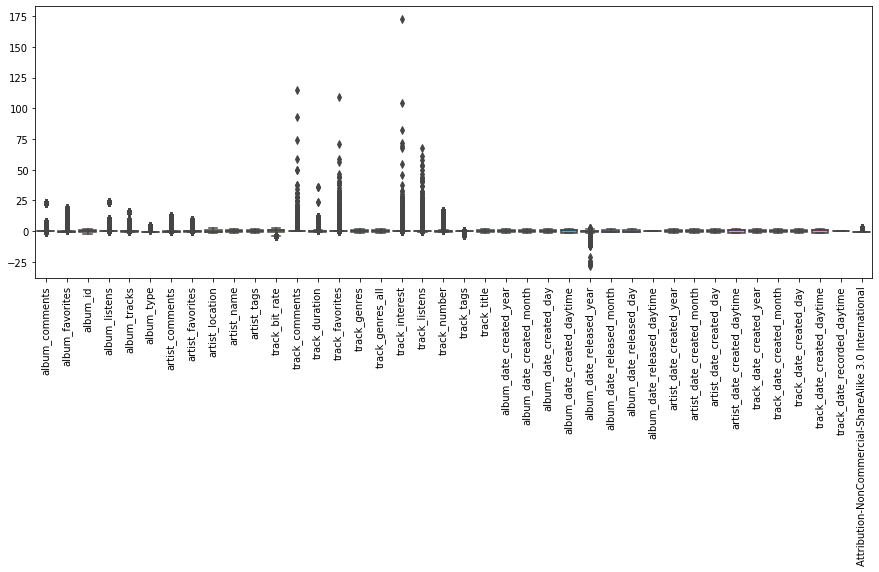

In [10]:
# Variable distribution

plt.subplots(figsize=(15,5))

sns.boxplot(data=tracks)
plt.xticks(rotation=90)
plt.show()

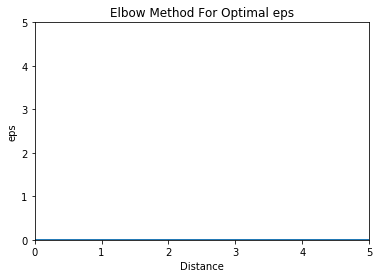

<Figure size 432x288 with 0 Axes>

In [11]:
neighbors = NearestNeighbors(n_neighbors=80)
neighbors_fit = neighbors.fit(train_data)
distances, indices = neighbors_fit.kneighbors(train_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.xlabel('Distance')
plt.ylabel('eps')
plt.title('Elbow Method For Optimal eps')
plt.show()
plt.savefig('dbscan_plot_dbscan.png')
plt.show()

In [ ]:
print('DBSCAN')

eps_vals = [1.0,2.0]
#eps_vals = [2.6]

for epss in eps_vals:
    dbscan = DBSCAN(eps=epss, min_samples=80)
    dbscan.fit(train_data)
    
    hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
    print('eps',epss,'labels', dict(zip(bins, hist)))

DBSCAN
eps 1.0 labels {-1: 106389, 0: 97, 1: 0}


In [49]:
cluster_0_idx = [x for x in range(len(dbscan.labels_)) if dbscan.labels_[x] == 0]
cluster_1_idx = [x for x in range(len(dbscan.labels_)) if dbscan.labels_[x] != 0]

df_cluster_0 = tracks[tracks.index.isin(cluster_0_idx)]
df_cluster_1 = tracks[tracks.index.isin(cluster_1_idx)]

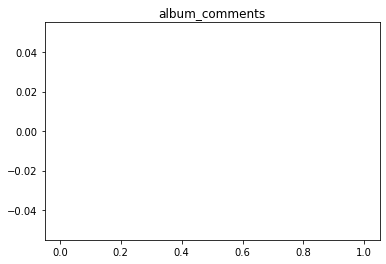

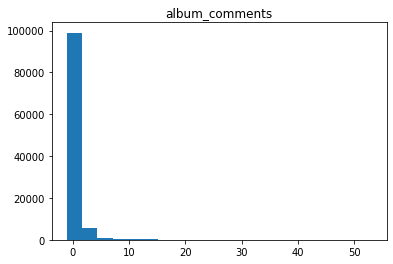

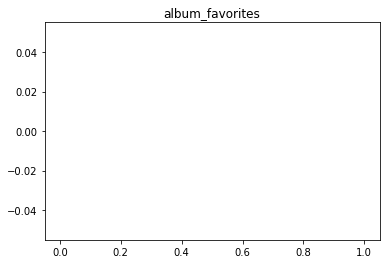

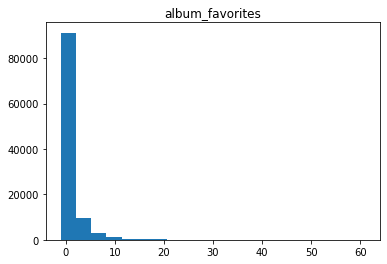

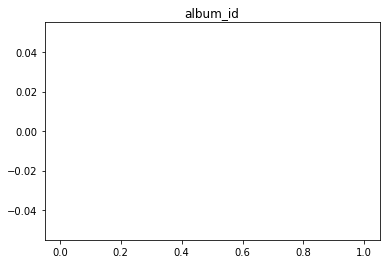

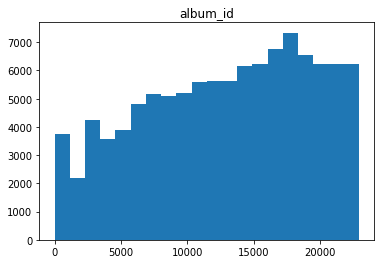

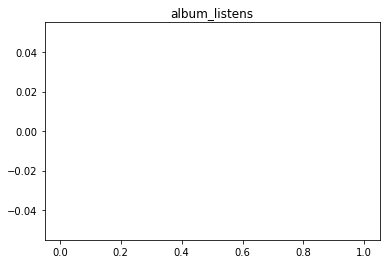

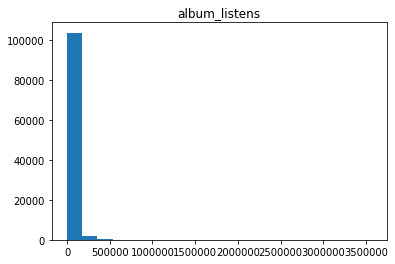

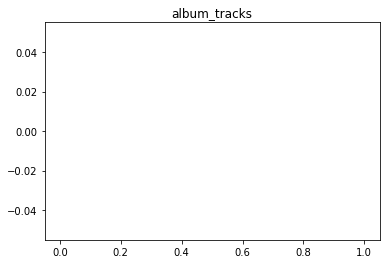

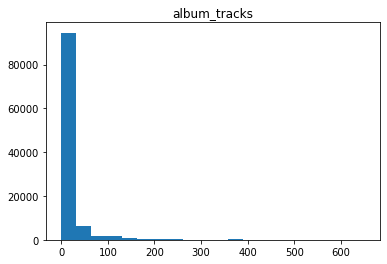

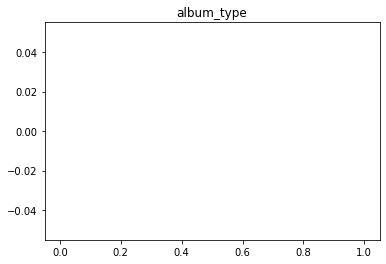

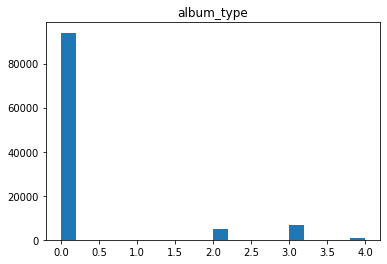

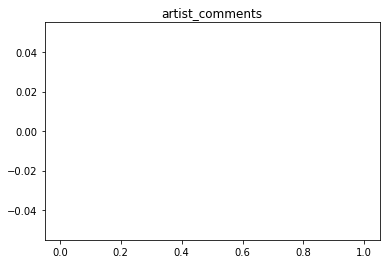

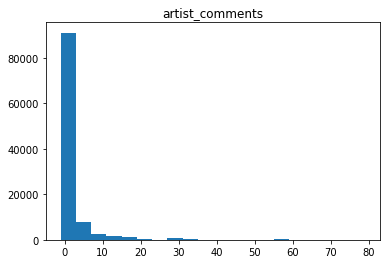

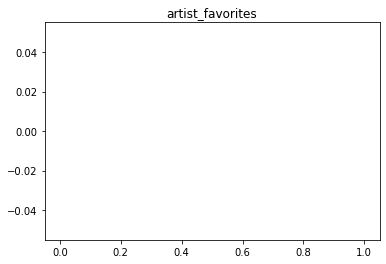

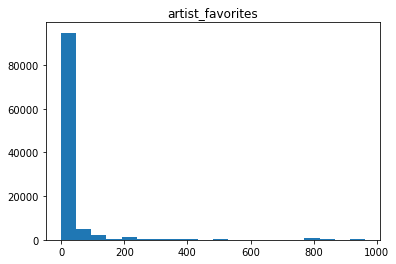

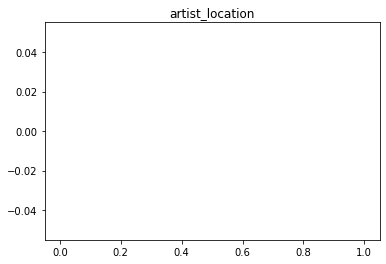

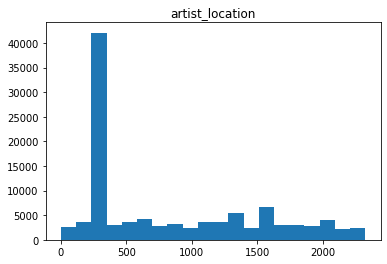

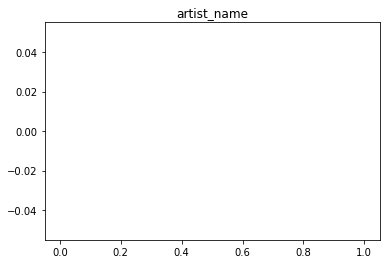

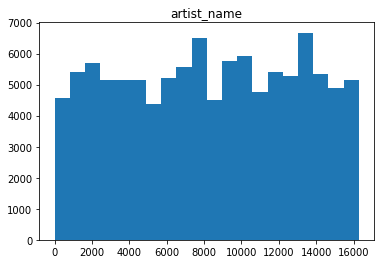

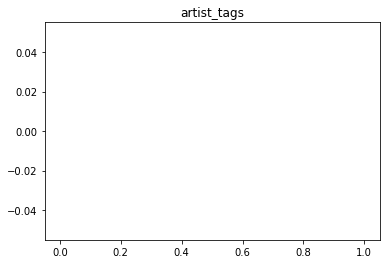

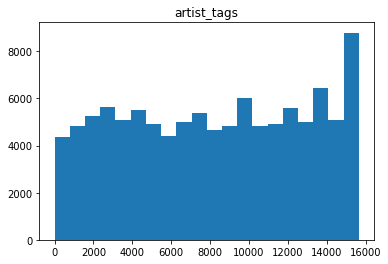

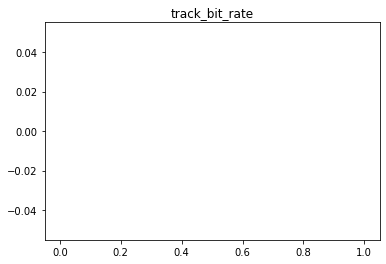

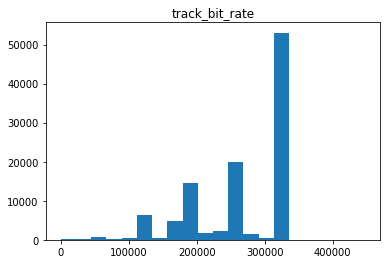

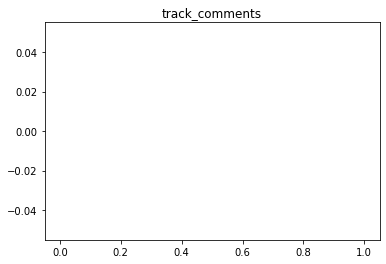

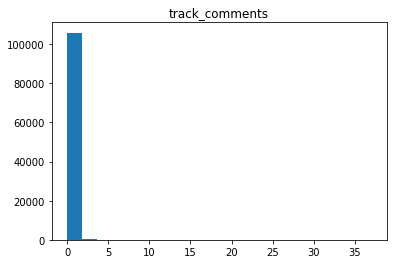

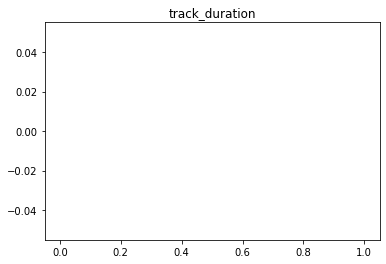

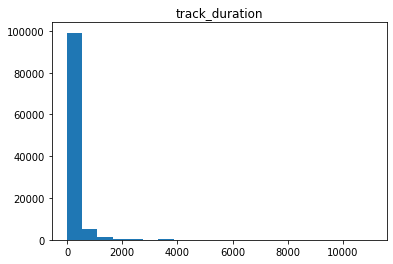

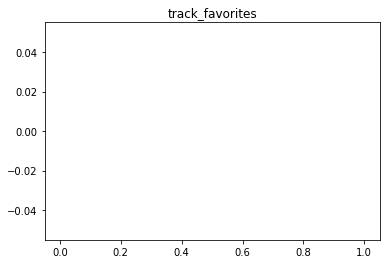

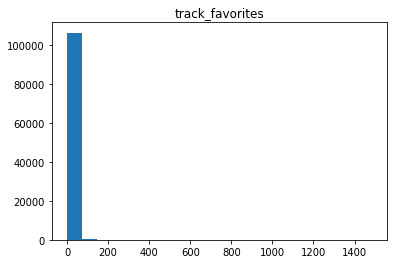

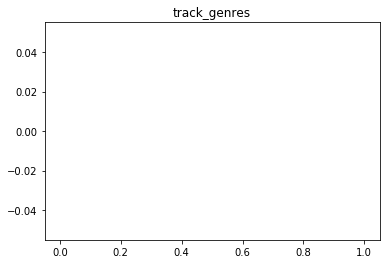

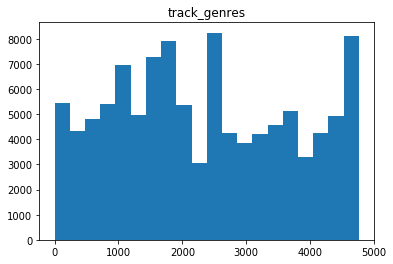

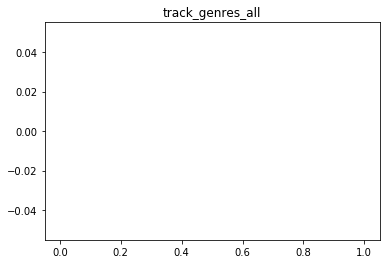

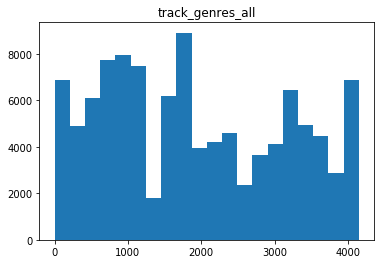

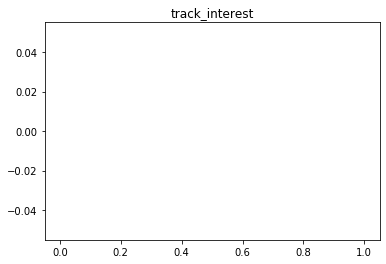

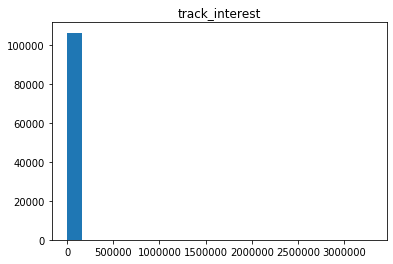

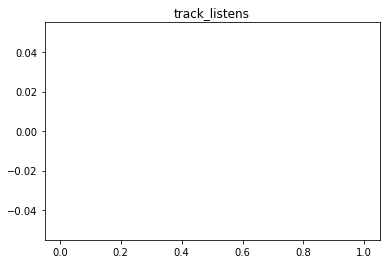

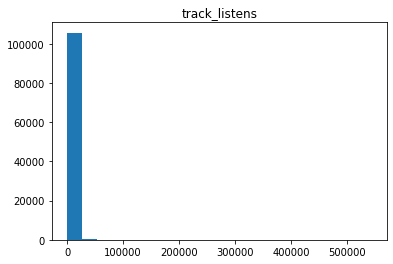

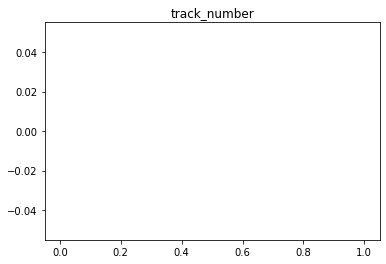

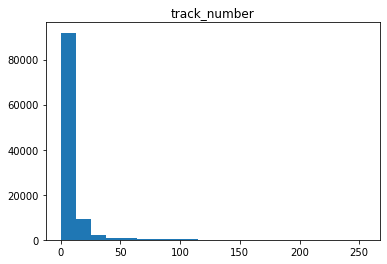

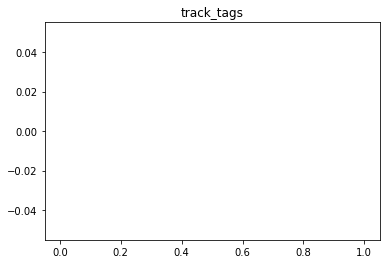

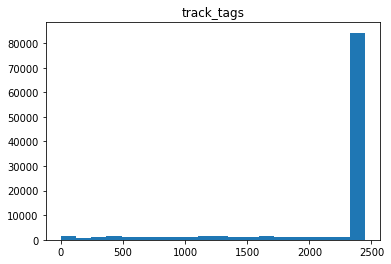

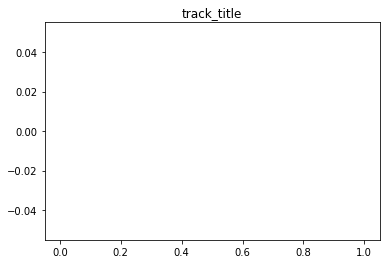

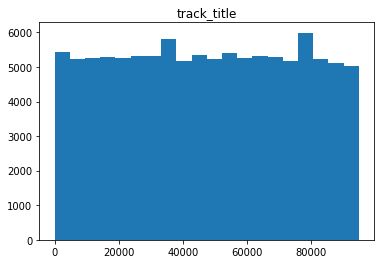

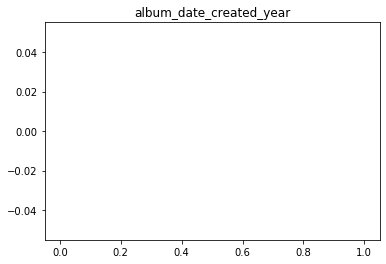

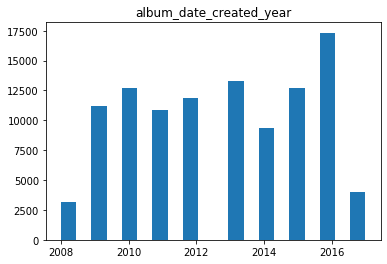

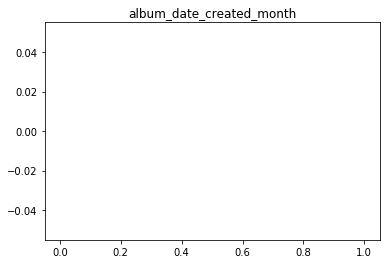

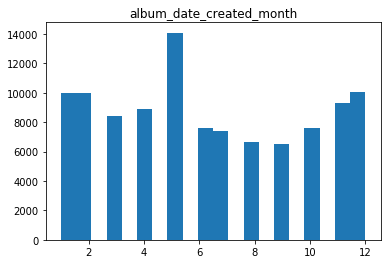

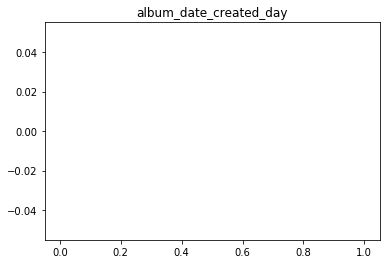

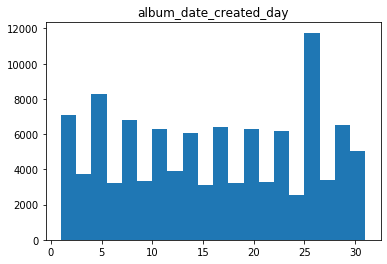

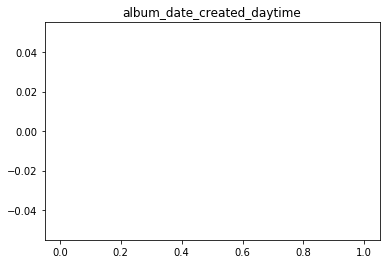

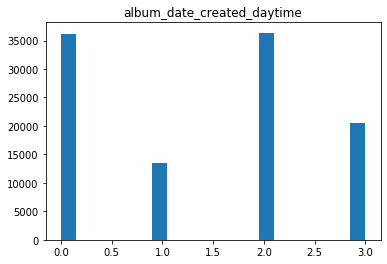

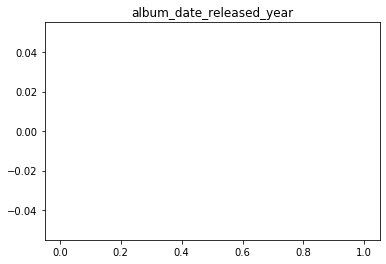

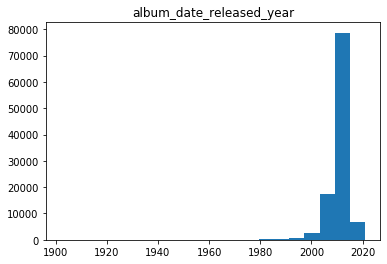

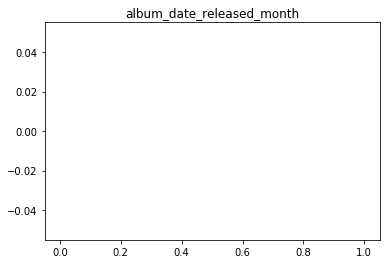

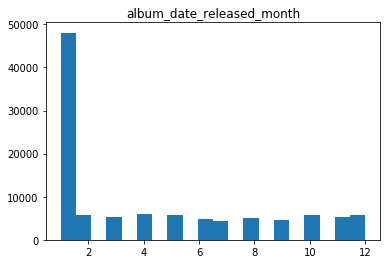

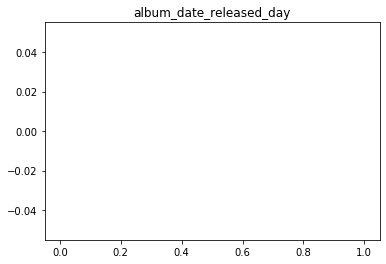

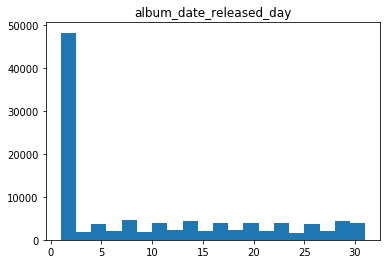

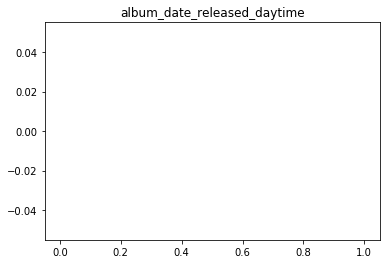

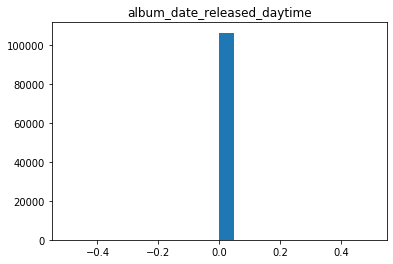

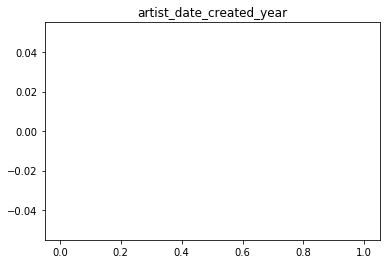

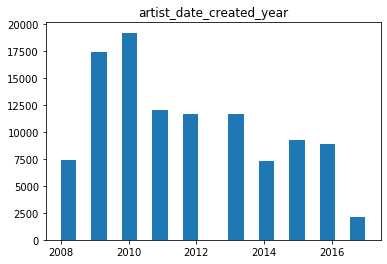

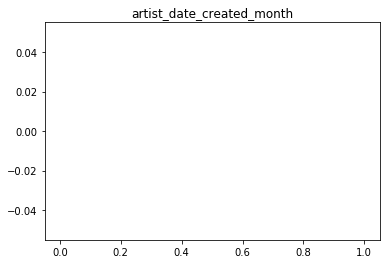

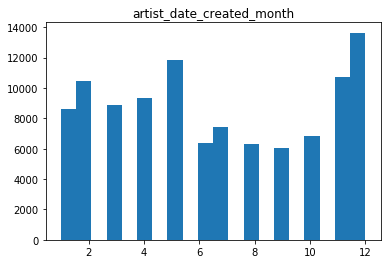

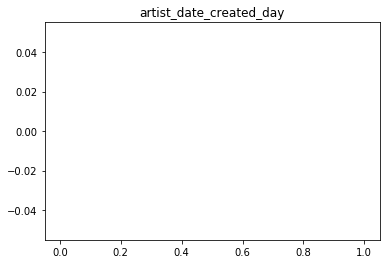

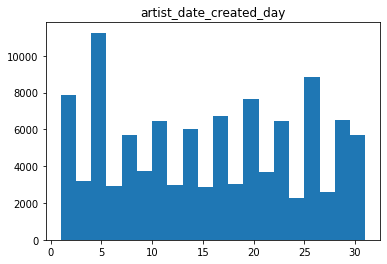

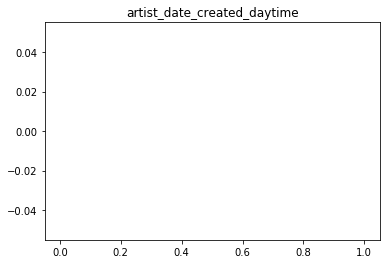

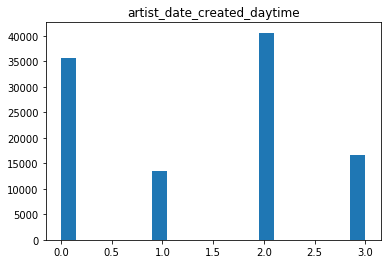

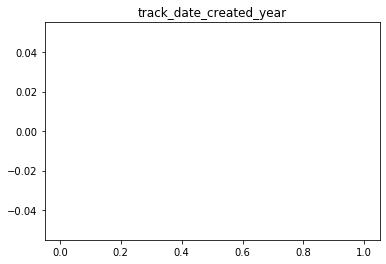

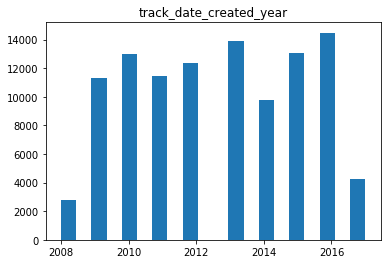

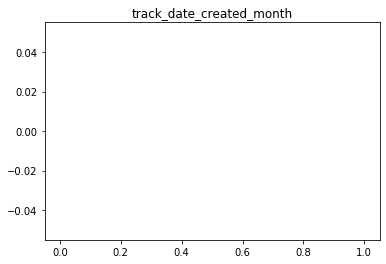

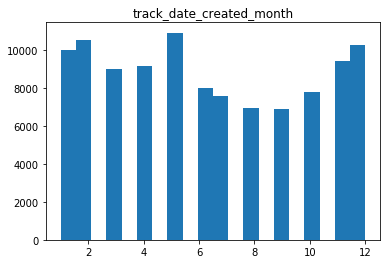

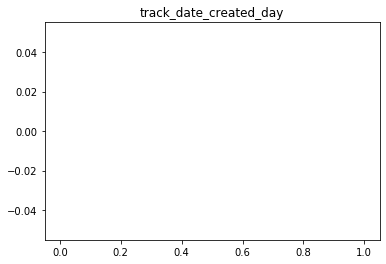

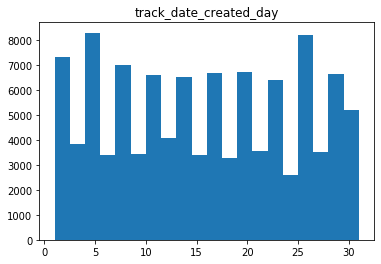

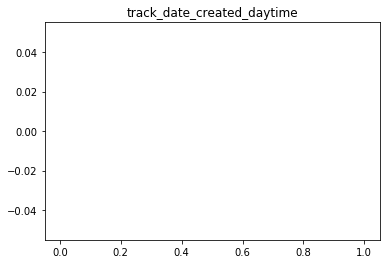

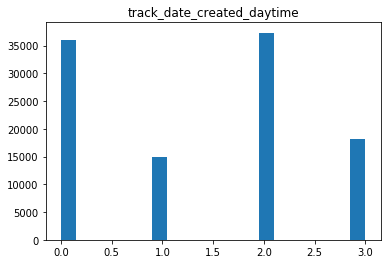

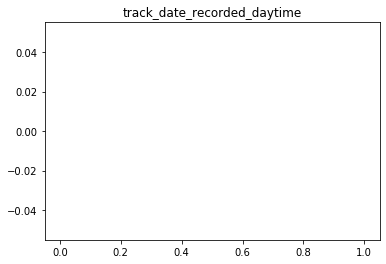

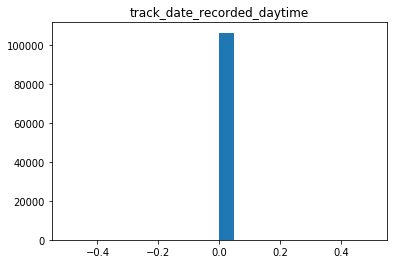

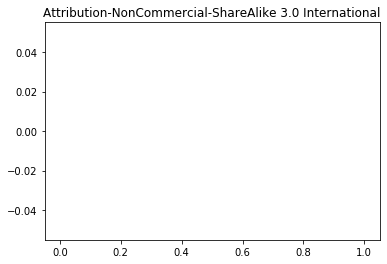

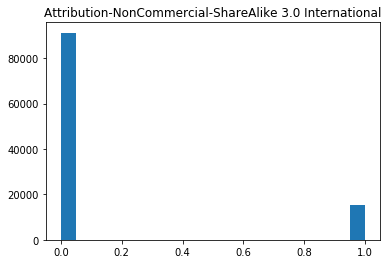

In [50]:
for col in df_cluster_0.columns:
    plt.hist(df_cluster_0[col], bins=20)
    plt.title(col)
    plt.show()
    
    plt.hist(df_cluster_1[col], bins=20)
    plt.title(col)
    plt.show()

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [16]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [17]:
clf.negative_outlier_factor_

array([-1.32727383, -1.02850653, -1.2046194 , ..., -1.01673432,
       -1.08505526, -1.22469715])

In [18]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([10649, 95837], dtype=int64))

In [19]:
np.where(outliers==-1)

(array([     4,     18,     19, ..., 106435, 106455, 106481], dtype=int64),)

In [20]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([ -1.75634319,  -1.72300206,  -2.04270144, ...,  -1.99573519,
       -12.48032375, -16.31050968])

In [21]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.6672208967366902

In [22]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-140.34290546115588

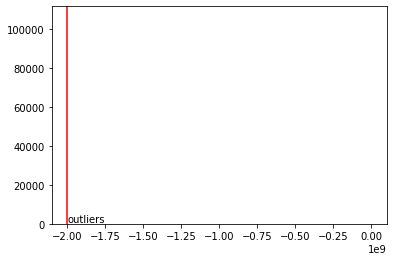

In [23]:
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(-0.2*1e10, c='r')
plt.text(-0.2*1e10, 600, 'outliers')
plt.show()

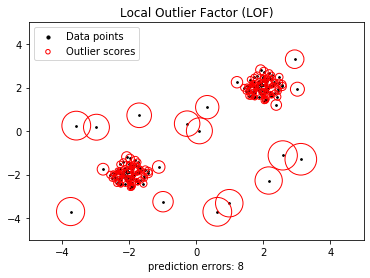

In [24]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=0, verbose=0)

In [27]:
outliers = clf.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [28]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 3077, 28869], dtype=int64))

PyOD

In [36]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.auto_encoder import AutoEncoder

ABOD

In [51]:
clf = ABOD(method="fast")
X_train, y_train, X_test, y_test = generate_data(n_train=200, n_test=100, n_features=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

C:\Users\user\anaconda3\lib\site-packages\pyod\utils\data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\pyod\models\base.py:365: RuntimeWarning: invalid value encountered in greater
  self.labels_ = (self.decision_scores_ > self.threshold_).astype(
C:\Users\user\anaconda3\lib\site-packages\

In [52]:
clf.decision_scores_

array([-9.15290696e+03, -3.17648795e+03, -2.99371982e+01, -3.71189999e+02,
       -1.66255613e+04, -9.67429514e+04, -8.47506019e+06, -4.57461596e+02,
       -1.07254949e+06, -6.85878466e+02, -2.25670389e+04, -6.55819617e+04,
       -8.01961933e+04, -1.12993419e+03, -2.32774786e+04, -2.69554996e+04,
       -1.61307981e+03, -3.39766248e+02, -1.01217054e+03, -4.22847231e+03,
       -1.68323414e+04, -2.42571058e+03, -2.18364167e+02, -4.41803685e+05,
       -3.19748778e+03, -8.53523096e+02, -8.67303091e+05, -1.00543882e+03,
       -1.07608110e+03, -2.52386370e+03, -1.04655160e+04, -1.98073082e+02,
       -2.22844036e+02, -4.14596402e+03, -4.35450563e+02, -5.38272611e+02,
       -1.12047243e+05, -2.82799787e+03, -7.64396678e+00, -3.48682893e+03,
       -2.95206474e+03, -1.44153255e+05, -1.09869407e+03, -1.21424948e+03,
       -3.93347239e+01, -4.40008276e+04, -2.00661192e+02, -1.79818586e+03,
       -1.62060594e+05, -3.93351146e+03, -5.51547724e+02, -2.53227041e+02,
       -8.00997347e+02, -

In [56]:
y_test_pred = clf.predict(X_test) 
y_test_scores = clf.decision_function(X_test)
y_test_proba = clf.predict_proba(X_test) 
#np.unique(outliers, return_counts=True)
evaluate_print(clf, y_test, y_test_scores)
visualize(clf, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\pyod\models\base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

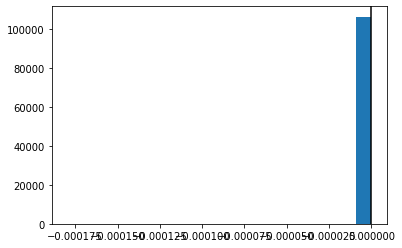

In [33]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

LOF

In [34]:
clf = LOF()
clf.fit(X)

outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([96934,  9552], dtype=int64))

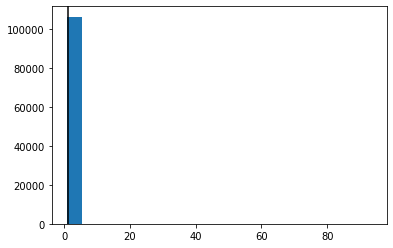

In [35]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

AutoEncoder

In [36]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
clf = AutoEncoder(hidden_neurons =[25, 2, 2, 25])

In [37]:
clf.fit(X_train)

outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 39)                1560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 39)                1560      
_________________________________________________________________
dropout_2 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

(array([0, 1]), array([67086,  7454], dtype=int64))

In [38]:
anomlay_score = clf.decision_function(X)

In [39]:
outliers_proba = clf.predict_proba(X)

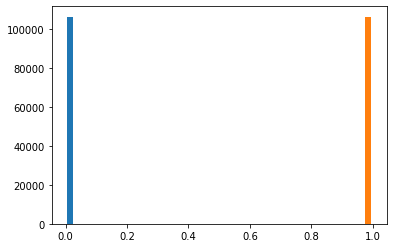

In [40]:
plt.hist(outliers_proba, bins=20)
#plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()

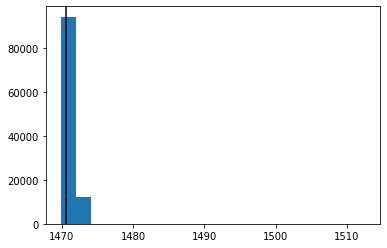

In [41]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()

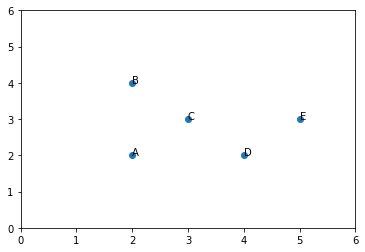

In [42]:
D = np.array([
    [2, 2],
    [2, 4],
    [3, 3],
    [4, 2],
    [5, 3],
])


plt.scatter(D[:, 0], D[:, 1])
for d, l in zip(D, ['A', 'B', 'C', 'D', 'E']):
    plt.text(d[0], d[1], l)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.show()

In [43]:
from scipy.spatial.distance import pdist, squareform

In [44]:
dist = squareform(pdist(D, 'cityblock'))
for i in range(len(dist)):
    dist[i, i] = np.inf
dist

array([[inf,  2.,  2.,  2.,  4.],
       [ 2., inf,  2.,  4.,  4.],
       [ 2.,  2., inf,  2.,  2.],
       [ 2.,  4.,  2., inf,  2.],
       [ 4.,  4.,  2.,  2., inf]])

In [45]:
k = 3
knn = np.argsort(dist, axis=1)[:, :k]
knn

array([[1, 2, 3],
       [0, 2, 3],
       [0, 1, 3],
       [0, 2, 4],
       [2, 3, 0]], dtype=int64)

In [46]:
Rknn = np.zeros((len(dist), len(dist)))
for i in range(len(dist)):
    for j in knn[i]:
        Rknn[j][i] = 1
Rknn

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [47]:
Rknn_count = np.sum(Rknn, axis=1)
Rknn_count.reshape(-1,1)

array([[4.],
       [2.],
       [4.],
       [4.],
       [1.]])

In [29]:
def remove_outlier_Hampel(df):
    med=df.median()
    List=abs(df-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list

In [33]:
for i in range(0, len(ind_diff),1):
    df_final=tracks.drop([ind_diff[i]])
    tracks=df_final
    
sns.boxplot(data=df_final)
plt.xticks(rotation=90)

TypeError: 'int' object is not subscriptable

In [12]:
# Get column names
column_names = tracks.columns
print(column_names)

# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, tracks[i].is_unique))

Index(['album_comments', 'album_favorites', 'album_id', 'album_listens',
       'album_tracks', 'album_type', 'artist_comments', 'artist_favorites',
       'artist_location', 'artist_name', 'artist_tags', 'track_bit_rate',
       'track_comments', 'track_duration', 'track_favorites', 'track_genres',
       'track_genres_all', 'track_interest', 'track_listens', 'track_number',
       'track_tags', 'track_title', 'album_date_created_year',
       'album_date_created_month', 'album_date_created_day',
       'album_date_created_daytime', 'album_date_released_year',
       'album_date_released_month', 'album_date_released_day',
       'album_date_released_daytime', 'artist_date_created_year',
       'artist_date_created_month', 'artist_date_created_day',
       'artist_date_created_daytime', 'track_date_created_year',
       'track_date_created_month', 'track_date_created_day',
       'track_date_created_daytime', 'track_date_recorded_daytime',
       'Attribution-NonCommercial-ShareAlike 3

In [46]:
tracks.head()

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
0,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
1,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
2,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
3,0,4,6,47632,2,0,3,74,343,7419,...,2008.0,11.0,26.0,3,2008,11,25,0,0,0
4,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
